# T-test

In [1]:
# environmental variables, settings and imports
%run '000-env.ipynb'

<IPython.core.display.Javascript object>

---

For previous distributions the sample size was assumed large (N>30). T Distribution aka **Student Distribution** is for sample sizes that are less than 30 **(N<30)**.

The t-distribution allows for use of small samples, but does so by sacrificing certainty with a margin-of-error trade-off. The t-distribution takes into account the sample size using **n-1 degrees of freedom**, which means there is a different t-distribution for every different sample size. If we see the t-distribution against a normal distribution, you'll notice the tail ends increase as the peak get 'squished' down. 

...as n gets larger, the t-distribution converges into a normal distribution.

Let's define a new variable called t, where
:
$$t=\frac{\overline{X}-\mu}{s}\sqrt{N-1}=\frac{\overline{X}-\mu}{s/\sqrt{N}}$$

which is analogous to the z statistic given by $$z=\frac{\overline{X}-\mu}{\sigma/\sqrt{N}}$$

The sampling distribution for t can be obtained:

## $$  f(t) = \frac {\varGamma(\frac{v+1}{2})}{\sqrt{v\pi}\varGamma(\frac{v}{2})} (1+\frac{t^2}{v})^{-\frac{v+1}{2}}$$

Where the gamma function is: $$\varGamma(n)=(n-1)!$$

And v is the number of degrees of freedom, typically equal to N-1. 

Similar to a z-score table used with a normal distribution, a t-distribution uses a t-table. Knowing the degrees of freedom and the desired cumulative probability (e.g. P(T >= t) ) we can find the value of t. Here is an example of a lookup table for a t-distribution: 

http://www.sjsu.edu/faculty/gerstman/StatPrimer/t-table.pdf


## One-sample T-test

Tests the null hypothesis that the population mean is equal to a specified value $\mu$ based on a sample mean $\bar{x}$  

This is a parametric test that determines whether a computed mean or statistical mean is similar to the observed mean.

.

[scipy.stats.ttest_1samp()](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_1samp.html#scipy.stats.ttest_1samp) tests if the **population mean of data is likely to be equal to a given value** (technically if observations are drawn from a Gaussian distributions of given population mean). It returns the T statistic, and the p-value

.

## Two-sample T-test

Independent two samples tests the null hypothesis that two sample means $\bar{x}_1$ and $\bar{x}_2$ are equal.  

Compares the mean of two independent samples to gather statistical evidence for determining the difference or similarity between the groups.

.

An example with male and female populations which were different. To test if this is significant, we do a 2-sample t-test with [scipy.stats.ttest_ind()](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html#scipy.stats.ttest_ind)

.

## Paired T-test

Also known as the **Dependent Sample** test, it is used to determine whether there is a similarity between two groups of observations or samples.   

In this test, each feature or entity is calculated twice, generating a pair of observations for hypothesis testing.

.

repeated measurements on the same individuals. 

The problem with this approach is that it forgets that there are links between observations. Thus the variance due to inter-subject variability is confounding, and can be removed, using a **“paired test”**, or **“repeated measures test”**

[scipy.stats.ttest_rel()](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_rel.html?highlight=ttest_rel#scipy.stats.ttest_rel)

.

## Wilcoxon signed-rank test

T-tests assume Gaussian errors. We can use a Wilcoxon signed-rank test, that relaxes this assumption:  

[scipy.stats.wilcoxon](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.wilcoxon.html?highlight=wilcoxon#scipy.stats.wilcoxon)

## Mann–Whitney U test

The corresponding test in the non paired case is the Mann–Whitney U test.

[scipy.stats.mannwhitneyu()](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mannwhitneyu.html#scipy.stats.mannwhitneyu)

.

---

## Resources

http://www.scipy-lectures.org/packages/statistics/index.html

.

In [2]:
youGrid('UetYS3PaHIo', 'yaSgoGLXKOg')

GridspecLayout(children=(Output(layout=Layout(grid_area='widget001')), Output(layout=Layout(grid_area='widget0…

.

---

## Examples

<span style="font-size:large;color:blue">
A sample distribution plot:
</span>

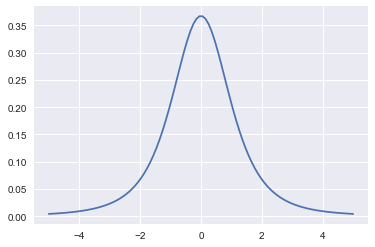

In [3]:
# Create x range
x = np.linspace(-5,5,100)

# Create the t distribution with scipy
rv = stats.t(3)

# Plot the PDF versus the x range
plt.plot(x, rv.pdf(x))
plt.show()

.

<span style="font-size:large;color:blue;font-weight:bold">
One-sample T-test
</span>

<span style="font-size:large;color:blue;font-weight:bold">
A car company claims that its Sedan averages 31 mpg. You randomly select eight Sedan from local car dealerships and test their gas mileage under similar conditions. 
    
You get the following mpg scores:
MPG: 30 28 32 26 33 25 28 30
</span>

<span style="font-size:large;color:blue">
Does the actual gas mileage for these cars deviate significantly from 31 (alpha=.05)?
</span>

$H_0$ = Cars do not differ in average = ($\mu = \mu_0$)  

$H_A$ = Cars differ in average = ($\mu \neq \mu_0$) 

In [16]:
# samples assigned to a var
mpg = np.array([30, 28, 32, 26, 33, 25, 28, 30])
n = len(mpg)
mu = 31
alpha = .05

In [27]:
# T-test for the mean of ONE group of scores with Scipy
stats.ttest_1samp(a=mpg, # Sample observation
                  popmean=mu, # Expected value in null hypothesis
                  alternative='two-sided' # Defines the alternative hypothesis.
                 )

Ttest_1sampResult(statistic=-2.0367003088692623, pvalue=0.0811068697473857)

p-value is greater than alpha; 

we can conclude that cars differ in their average mileage, as the evidence supports this hypothesis

.

<span style="font-size:large;color:blue;font-weight:bold">
A car company has two plants: A and B with given daily production over the same 10 days.
</span>

<span style="font-size:large;color:blue;font-weight:normal">
The company wants to know if there’s a significant difference in production between the two plants.
</span>

In [41]:
# Daily production over the same 10 days of two car producing plants A and B
prod = pd.DataFrame([[1184,1136],[1203,1178],[1219,1212],[1238,1193],[1243,1226],[1204,1154],[1269,1230],[1256,1222],[1156,1161],[1248,1148]],
            columns=["PlantA","PlantB"])

In [46]:
# describe the plant data, esp. means
prod.describe()

,PlantA,PlantB
count,10.000,10.000
mean,"1,222.000","1,186.000"
std,35.327,35.299
min,"1,156.000","1,136.000"
25%,"1,203.250","1,155.750"
50%,"1,228.500","1,185.500"
75%,"1,246.750","1,219.500"
max,"1,269.000","1,230.000"


one-tailed test:  


$H_0 = X_A <= X_B$  

$H_A = X_A > X_B$

In [48]:
# degrees of freedom
dof = prod.PlantA.count()+prod.PlantB.count() - 2
dof

18

In [50]:
# t critical value with 95% confidence for 18 dof
t_critical = stats.t.ppf(.95, dof)
t_critical

1.7340636066175354

In [56]:
# t value
tvalue, pvalue = stats.ttest_ind(a=prod.PlantA, b=prod.PlantB, alternative='two-sided')
print('t-value:', tvalue, 'p-value:', pvalue)

t-value: 2.2795770510504845 p-value: 0.03504505626727664


In [57]:
# compare t-value with t-critical
tvalue > t_critical

True

..than we reject the null hypothesis

We believe with 95% confidence that Plant A produces more cars per day than Plant B.   
We may decide to close Plant B.

.